# <font color="orange">* Lead Score Analysis for Sales Team *</font>

### Problem statement
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone


In [1]:
# importing the required libraries

# warning setting
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler

# display setting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# reading lead data file

lead_data = pd.read_csv("Leads.csv")
lead_data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [3]:
print(lead_data.shape)
print('-'*100)
print(lead_data.info())

(9240, 37)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent

In [4]:
# checking the stats of the raw data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# analysing prospect ID which is unique in nature
# No Duplicates are noticed in prospect ID 
print("Data shape:", lead_data.shape[0])
print("Value count in prospect ID: ",lead_data["Prospect ID"].value_counts().sum())
print("Unique value count: ", len(lead_data["Prospect ID"].unique()))
print("Zero Null values: ",lead_data["Prospect ID"].isnull().sum()==0)

Data shape: 9240
Value count in prospect ID:  9240
Unique value count:  9240
Zero Null values:  True


### Data Preparation and EDA

In [6]:
# We can drop prospect ID and lead numbers as it indicates systems generated data, 
# & does'nt give useful insights.

lead_data.drop(["Lead Number","Prospect ID"],axis=1,inplace=True)

In [7]:
lead_data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [8]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [9]:
# analysing categorical data
cat_colm = ['Lead Origin','Lead Source','Do Not Email','Do Not Call',
 'Last Activity','Country','Specialization','How did you hear about X Education',
 'What is your current occupation','What matters most to you in choosing a course',
 'Search','Magazine','Newspaper Article','X Education Forums',
 'Newspaper','Digital Advertisement','Through Recommendations',
 'Receive More Updates About Our Courses','Tags','Lead Quality',
 'Update me on Supply Chain Content','Get updates on DM Content',
 'Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
 'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
lead_data[cat_colm].head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened


In [11]:
# checking the unique values in each categorical column
for i in cat_colm:
    print("\n",'-'*50,"\n",i,":", lead_data[i].unique())


 -------------------------------------------------- 
 Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

 -------------------------------------------------- 
 Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

 -------------------------------------------------- 
 Do Not Email : ['No' 'Yes']

 -------------------------------------------------- 
 Do Not Call : ['No' 'Yes']

 -------------------------------------------------- 
 Last Activity : ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approa

In [12]:
# from the above output some categorical columns have values as "select" which is not informative,
# so will replce it with null
lead_data.replace("Select",np.nan,inplace=True)

In [13]:
# checking for percentage of null values present in each column
# columns with more than 45 % of null values will not be useful, hence will remove such columns

check_null = round(((lead_data.isnull().sum()/len(lead_data.index))*100),2)
print(check_null.sort_values(ascending=False))

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [14]:
for i in lead_data.columns:
    if (check_null[i] >= 45):
        lead_data.drop(i,axis=1,inplace=True)

check_null = round(((lead_data.isnull().sum()/len(lead_data.index))*100),2)
print(check_null.sort_values(ascending=False))

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [15]:
# from the above summary we still left with few categorical columns 
# which contains some percentage of null values, lets explore each variable one by one
# will start with city column by checking the total value count 

print(lead_data["City"].value_counts(dropna=False))
print("-"*100)
print("Most common city: ",lead_data["City"].mode()[0])

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
----------------------------------------------------------------------------------------------------
Most common city:  Mumbai


In [16]:
# since majority of target audience is from mumbai city, 
# so we can replace all null city with Mumbai

lead_data["City"].replace(np.nan,lead_data["City"].mode()[0],inplace=True)
print(lead_data["City"].value_counts(dropna=False))

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


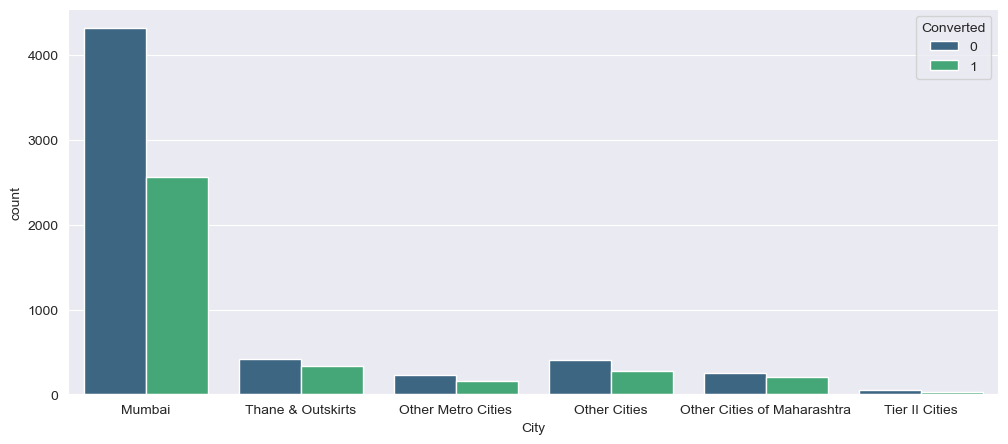

In [17]:
# visual view of city columns
# Mumbai is the most common city
plt.figure(figsize=[12,5])
sns.countplot(data=lead_data,x="City",hue="Converted",palette='viridis')
plt.show()

In [18]:
#  analysing country column
print("Most common country: ",lead_data.Country.mode()[0])
print("-"*50)
print(lead_data.Country.value_counts(dropna=False))

Most common country:  India
--------------------------------------------------
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania              

In [19]:
# replacing null country values with India

lead_data.Country.replace(np.nan,lead_data.Country.mode()[0],inplace=True)
print(lead_data.Country.value_counts(dropna=False))

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

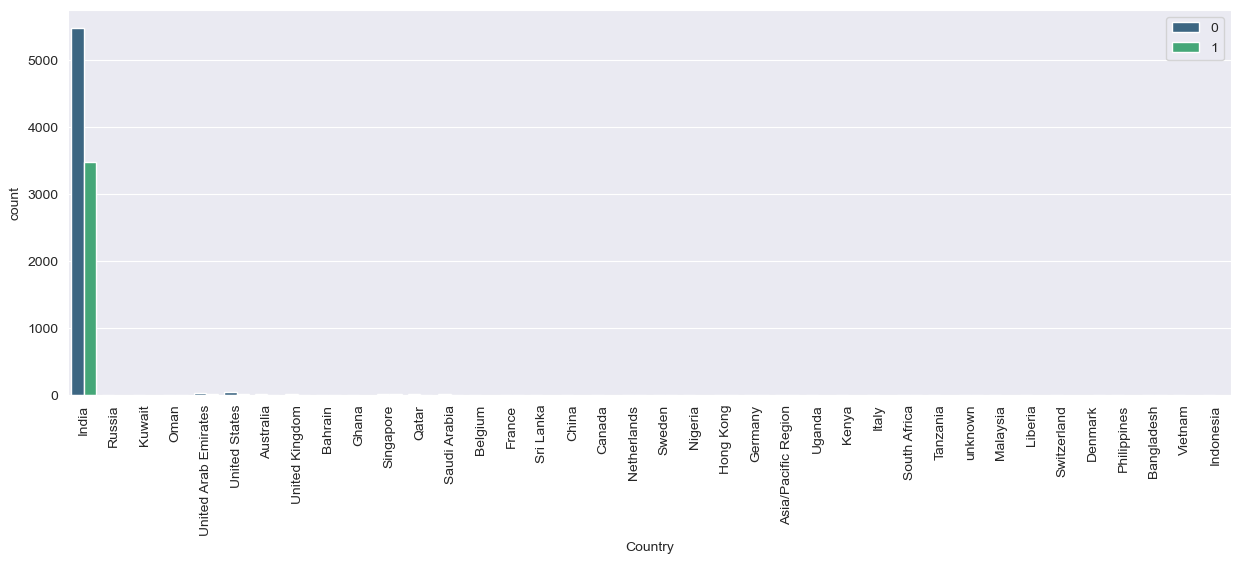

In [20]:
# Visual View of Country column

plt.figure(figsize=[15,5])
plt_country = sns.countplot(data=lead_data,x="Country",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=90)
plt.legend(loc=1)
plt.show()

In [21]:
# Country India shows biasness in the data, Hence we can remove the column

lead_data.drop("Country",axis=1,inplace=True)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [22]:
# Checking specialization columns

lead_data.Specialization.value_counts(dropna=False)

# from below output we have 3380 values which do not have specialization defined,
# we can replace Null with value as "Unknowm"  

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
lead_data.Specialization.replace(np.NaN,"Unknown",inplace=True)

In [24]:
lead_data.Specialization.value_counts(dropna=False)

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

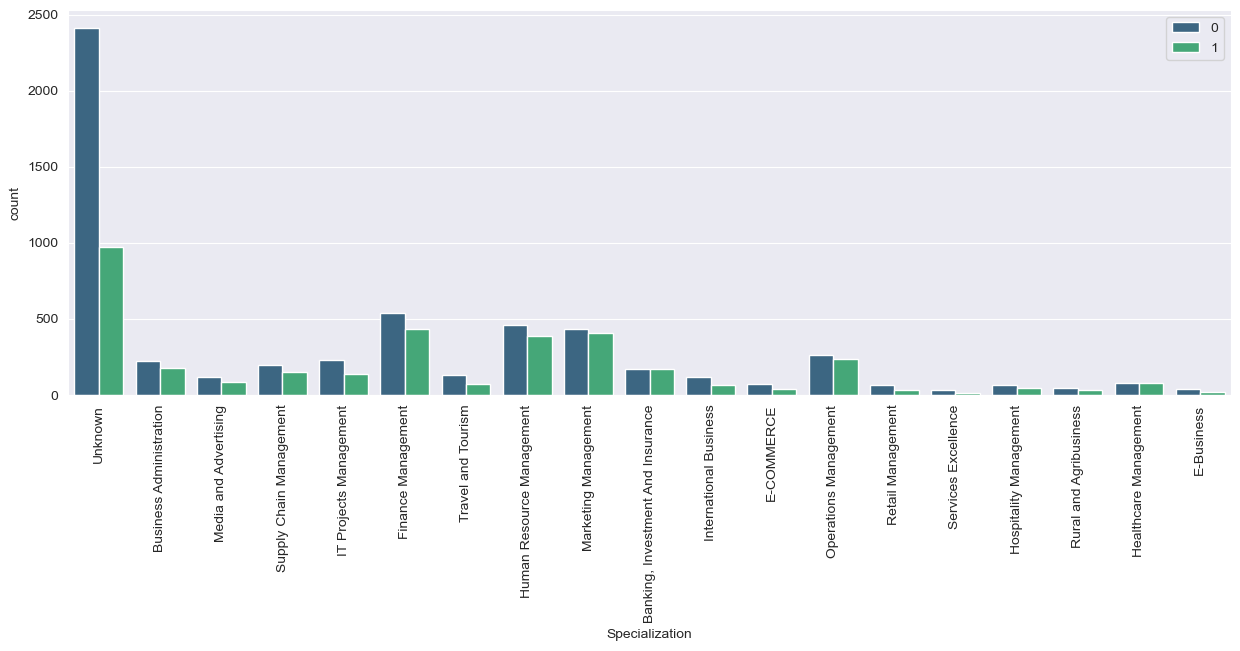

In [25]:
# Visualizaing the above result

plt.figure(figsize=[15,5])
plt_country = sns.countplot(data=lead_data,x="Specialization",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=90)
plt.legend(loc=1)
plt.show()

# As you can see unknown profiles are quite high.

In [26]:
# As we see from the above output there are many management speicalizations plotted, 
# we can categories such roles in one common category called "Management Specializations" 
lead_data.Specialization.replace(['Finance Management','Human Resource Management',
     'Marketing Management','Operations Management',
     'IT Projects Management','Supply Chain Management',
     'Healthcare Management','Hospitality Management',
     'Retail Management'] ,'Management Specializations', inplace=True)

In [27]:
lead_data.Specialization.value_counts()

Management Specializations           4253
Unknown                              3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Tags                                             36.29
# What matters most to you in choosing a course    29.32
# What is your current occupation                  29.11

# Checking the occupation column

print(lead_data['What is your current occupation'].value_counts(dropna=False))
print("-"*50)
print("Most common occupation type: ",lead_data['What is your current occupation'].mode()[0])

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
--------------------------------------------------
Most common occupation type:  Unemployed


In [29]:
# Replacing nulls with most common value which is Unemployed

replace_text = lead_data['What is your current occupation'].mode()[0]
lead_data['What is your current occupation'].replace(np.nan,replace_text,inplace=True)

In [30]:
print(lead_data['What is your current occupation'].value_counts(dropna=False))

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


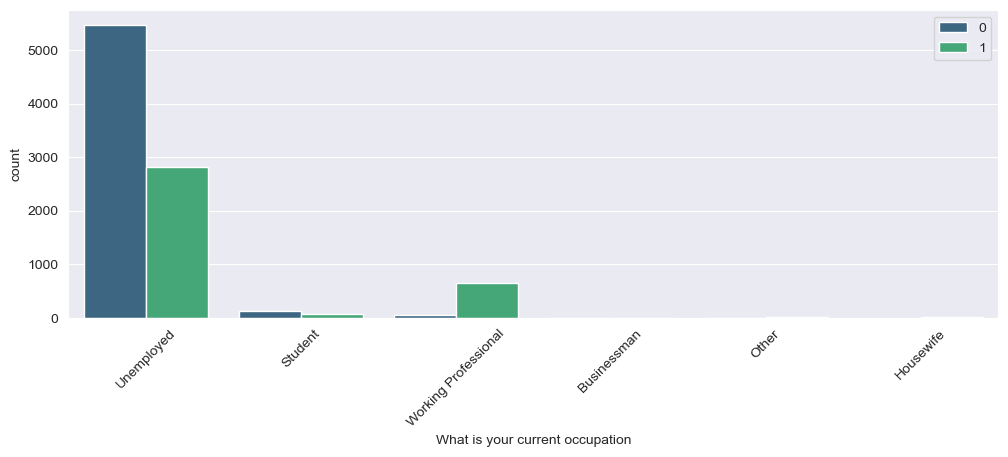

In [31]:
# Visualizaing the above result

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="What is your current occupation",
                            hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=45)
plt.legend(loc=1)
plt.show()


In [32]:
# checking the QA column

lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
lead_data['What matters most to you in choosing a course'].mode()[0]

'Better Career Prospects'

In [34]:
# replacing null with above value
replace_text = lead_data['What matters most to you in choosing a course'].mode()[0]
lead_data['What matters most to you in choosing a course'].replace(np.nan,replace_text,inplace=True)

In [35]:
# validation check
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

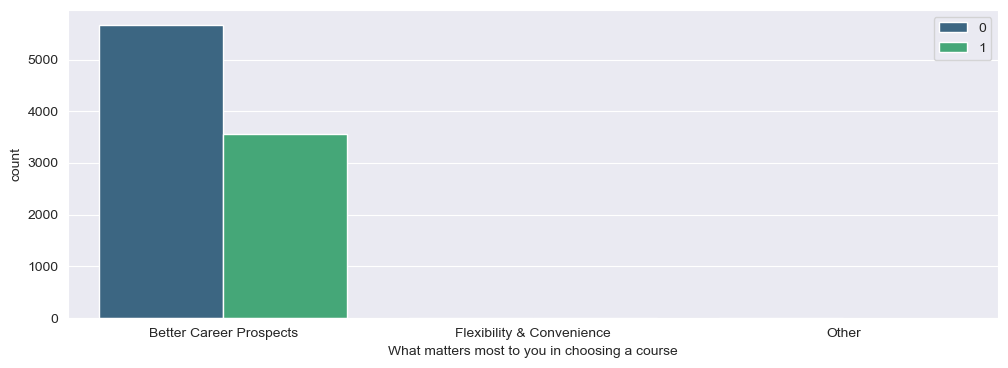

In [36]:
# Visualizaing the above result

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="What matters most to you in choosing a course",
                            hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels())
plt.legend(loc=1)
plt.show()

In [37]:
#  "What matters most to you in choosing a course" column creating the biasness in data. 
# Hence, we can drop this column 

lead_data.drop("What matters most to you in choosing a course",axis=1,inplace=True)

In [38]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [39]:
# checking the tag column
lead_data['Tags'].value_counts(dropna=False)
# we can replace the null values as unknowm

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
lead_data['Tags'].replace(np.nan,'Unknown',inplace=True)

In [41]:
# validation check
lead_data['Tags'].value_counts(dropna=False)

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

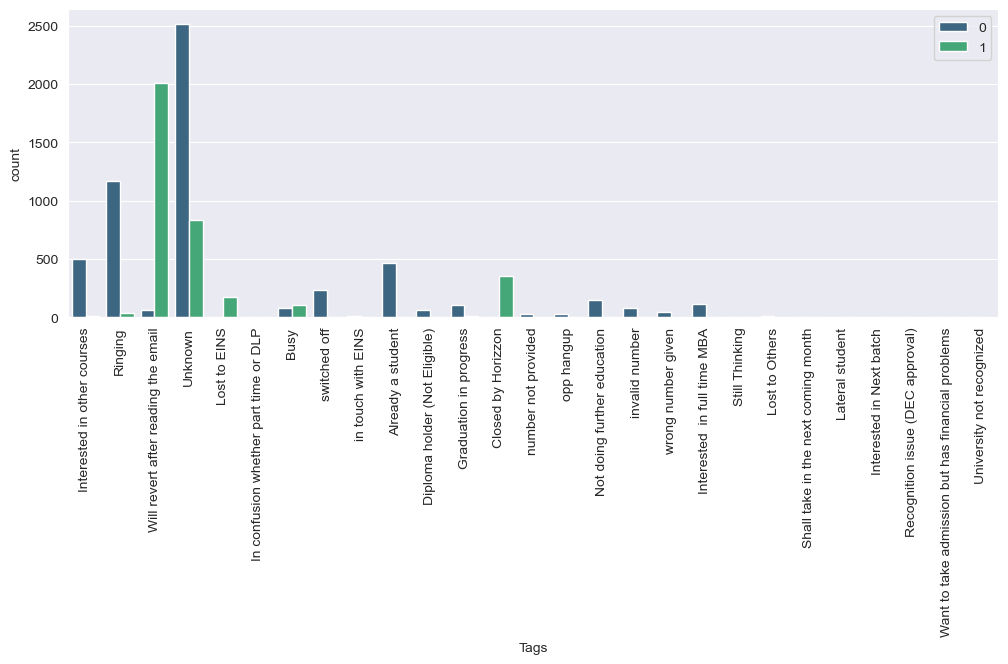

In [42]:
# Visualizaing the above result

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="Tags",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=90)
plt.legend(loc=1)
plt.show()

In [43]:
# since some tags infers no good insights, we will categories such tags as "Other Tags"

lead_data['Tags'].replace(
[
'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
'Recognition issue (DEC approval)','Want to take admission but has financial problems',
'University not recognized','switched off','Already a student','Not doing further education',
'invalid number','wrong number given','Interested  in full time MBA'
], 'Other Tags',inplace=True)

In [44]:
lead_data['Tags'].value_counts(dropna=False)

Unknown                                3353
Will revert after reading the email    2072
Other Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [45]:
# checking the frequency of null values in the dataset

lead_data.isnull().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Lead Origin                                   0
Newspaper                                     0
A free copy of Mastering The Interview        0
I agree to pay the amount through cheque      0
City                                          0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Tags                                          0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper Article                             0
X Education Forums                            0
Magazine                                      0
Search                                        0
What is your current occupation               0
Specialization                          

In [46]:
# checking the values of lead source
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [47]:
lead_data['Lead Source'].replace(np.nan,'Others',inplace=True)

In [48]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [49]:
# This column has bit of redundant categories, lets combine these categories.
lead_data['Lead Source'].replace('google','Google',inplace=True)
lead_data['Lead Source'].replace('Facebook','Social Media',inplace=True)
lead_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                   'youtubechannel','welearnblog_Home',
                                   'WeLearn','blog','Pay per Click Ads',
                                   'testone','NC_EDM'] ,'Others',inplace=True)                                                   

In [50]:
lead_data['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

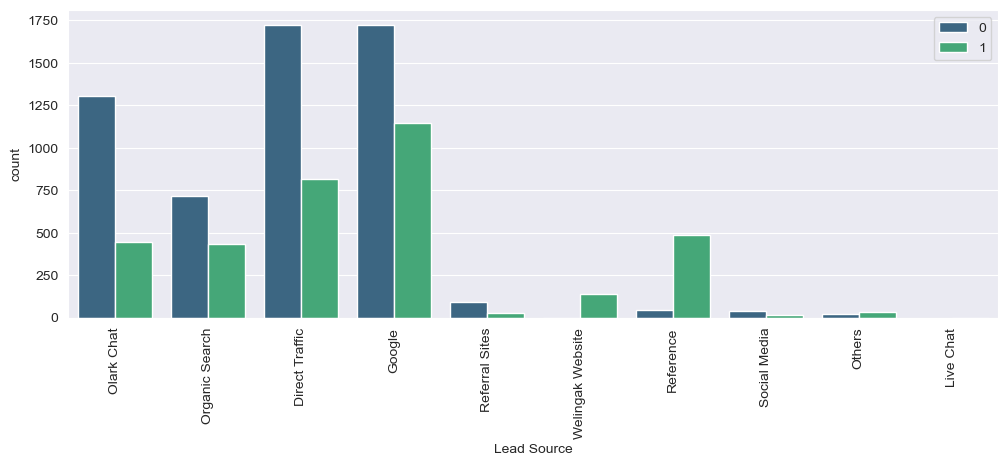

In [51]:
# Visualizaing the above result

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="Lead Source",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=90)
plt.legend(loc=1)
plt.show()

### insights
- most of the leads are gathered from Google and Direct Traffic.
- welingak and reference has the most conversion rate. 
- we can recommend business to utilize these channels effectively.


In [52]:
# checking the last activity column
lead_data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [53]:
lead_data['Last Activity'].replace(np.nan,'Others',inplace=True)

In [54]:
lead_data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Others                           1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [55]:
# from the above ratio, categories with less than 1% will not give enough insights, 
# we can mark those categories in single category as others.

#replacing categories which are less than 1% to Others as it does not make much impact for analysis

lead_data['Last Activity'].replace(
['Unreachable','Unsubscribed','Had a Phone Conversation', 
 'Approached upfront','View in browser link Clicked','Email Marked Spam',
 'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],
'Others',inplace=True)


In [56]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

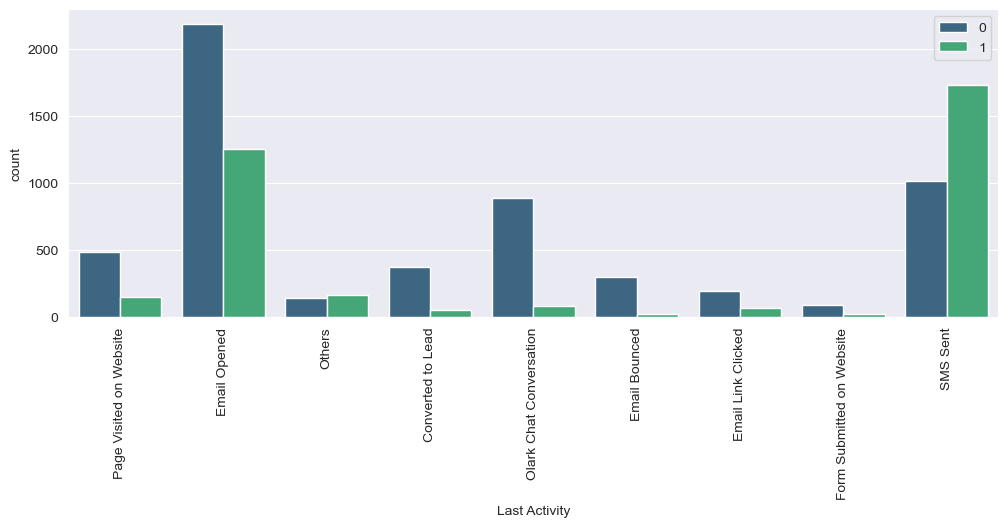

In [57]:
# Visualizaing the above result

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="Last Activity",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=90)
plt.legend(loc=1)
plt.show()

- conversion rate for SMS sent is quite high

In [58]:
# checking the null frequency

round((lead_data.isnull().sum()/len(lead_data.index))*100,2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [59]:
# since most the columns have no or zero null values,
# we can drop the nulls where the percentage is very less

lead_data.dropna(inplace=True)

In [60]:
# validation check

round((lead_data.isnull().sum()/len(lead_data.index))*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [61]:
lead_data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened


In [62]:
lead_data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

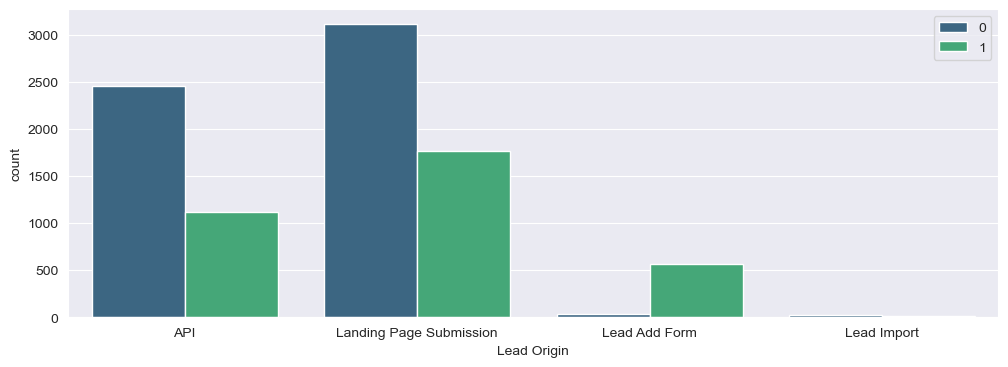

In [63]:
# analysing lead origin column

plt.figure(figsize=[12,4])
plt_country = sns.countplot(data=lead_data,x="Lead Origin",hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=0)
plt.legend(loc=1)
plt.show()

### INSIGHTS
- API and landing page submission has high number of leads and conversion rate.
- We can leaverage "Lead Add Form" for more leads as it indicates more chances of conversion rate.

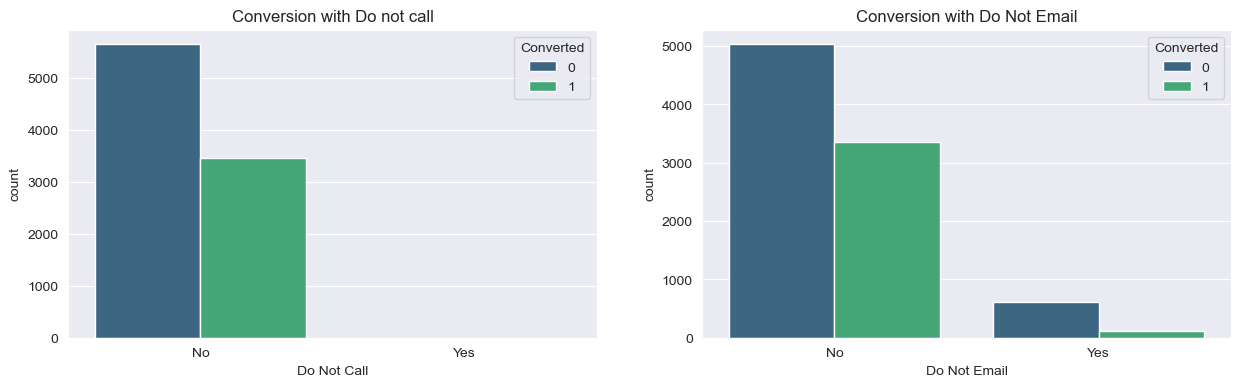

In [64]:
# Analysing Do Not Email & Do Not Call columns

plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
sns.countplot(lead_data['Do Not Call'], hue=lead_data['Converted'],palette='viridis')
plt.title("Conversion with Do not call")

plt.subplot(1, 2, 2)
sns.countplot(lead_data['Do Not Email'], hue=lead_data['Converted'],palette='viridis')
plt.title("Conversion with Do Not Email")
plt.show()

In [65]:
print(lead_data['Do Not Call'].value_counts())
print('-'*100)
print(lead_data['Do Not Email'].value_counts())

No     9101
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------------------------------------
No     8379
Yes     724
Name: Do Not Email, dtype: int64


- Since "Do Not Call" has "No" as most occuring category it will create bias. So we can remove this from data

In [66]:
lead_data.drop("Do Not Call", axis=1, inplace=True)

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

In [68]:
# chekcing the remaining categorical columns scope for deletion.

object_var = (
['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content',
 'I agree to pay the amount through cheque']
)

In [69]:
for i in object_var:
    print(i)
    print(lead_data[i].value_counts(dropna=False))
    print("-"*100)

Search
No     9089
Yes      14
Name: Search, dtype: int64
----------------------------------------------------------------------------------------------------
Magazine
No    9103
Name: Magazine, dtype: int64
----------------------------------------------------------------------------------------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
----------------------------------------------------------------------------------------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
----------------------------------------------------------------------------------------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
----------------------------------------------------------------------------------------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
--------------------------------------------------------------------------

In [70]:
# from the above output, the variables listed are not much useful and creating biasness in the data. 
# We can get rid of these information

lead_data.drop(object_var,axis=1,inplace=True)

In [71]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [72]:
lead_data.shape

(9103, 14)

In [73]:
# checking last Notable Activity
lead_data['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.516313
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Approached upfront               0.010985
Resubscribed to emails           0.010985
View in browser link Clicked     0.010985
Form Submitted on Website        0.010985
Email Received                   0.010985
Name: Last Notable Activity, dtype: float64

In [74]:
#We can consolidate the categories that has less than 1% occurance on the Last Notable Activity

lead_data['Last Notable Activity'].replace(
['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',
'Resubscribed to emails','View in browser link Clicked','Approached upfront', 
 'Form Submitted on Website','Email Received'],
'Other Notable Activity',inplace=True)

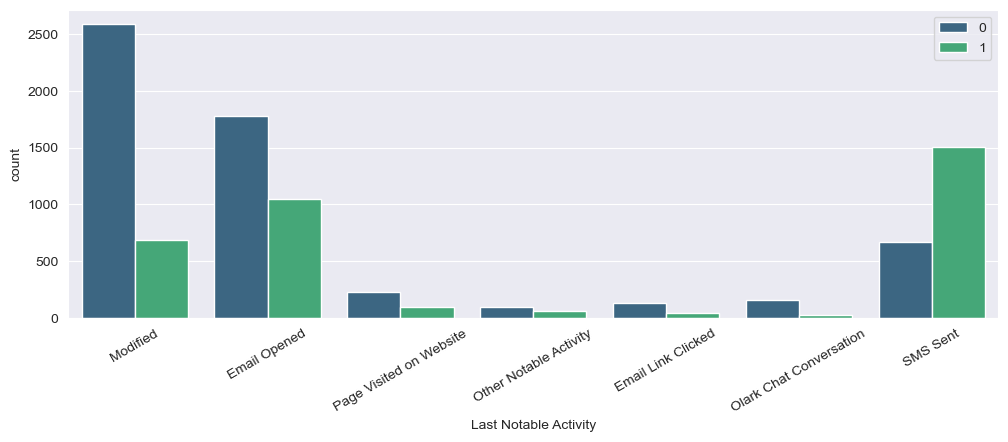

In [75]:
plt.figure(figsize=[12,4])
plt_country=sns.countplot(data=lead_data,x='Last Notable Activity',hue="Converted",palette='viridis')
plt_country.set_xticklabels(plt_country.get_xticklabels(),rotation=30)
plt.legend(loc=1)
plt.show()

### Insights
- SMS send has more conversion rate than any other Activity.
- Modified does not show any higher conversion rate, even if it has large number os leads.
- Email Opened has good conversion rate as well

### Analysing Nymerical variables

In [76]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [77]:
lead_data.Converted.value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

In [78]:
# from the above result , we can see the conversion rate is ~38 %

In [79]:
lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


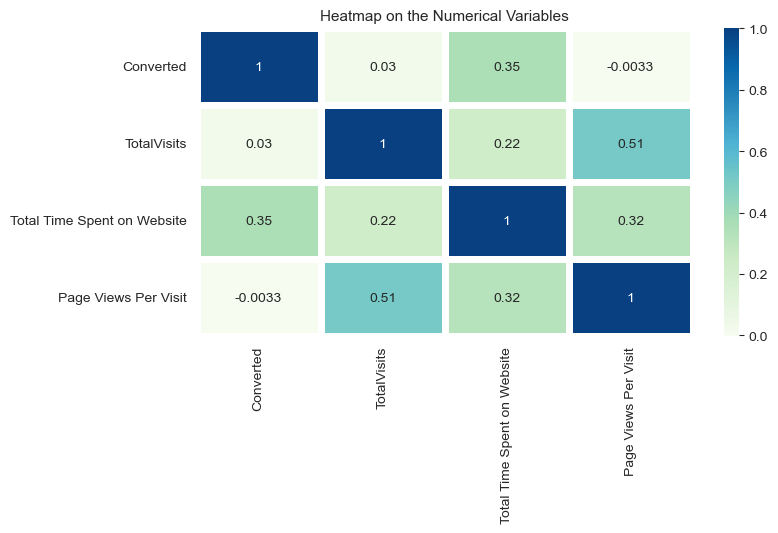

In [80]:
# Findind correlation between numerical variables

plt.figure(figsize=[8,4])
sns.heatmap(lead_data.corr(),cmap="GnBu",annot=True,linecolor="White",linewidths=5)
plt.title("Heatmap on the Numerical Variables",fontsize=11)
plt.show()

In [81]:
# analysing Total Time Spent on Website
lead_data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

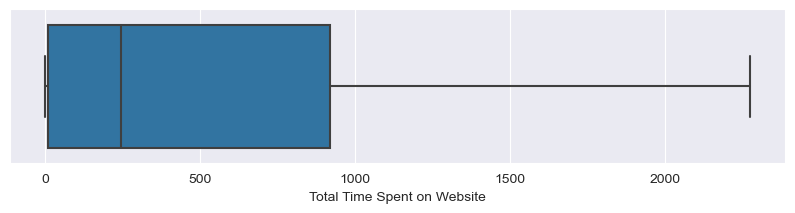

Median of Total Time Spent on Website is 244.0


In [82]:
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_data['Total Time Spent on Website'],color="#1f77b4")
plt.show()
print("Median of Total Time Spent on Website is",lead_data['Total Time Spent on Website'].median())

In [83]:
# Analysing TotalVisits
lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

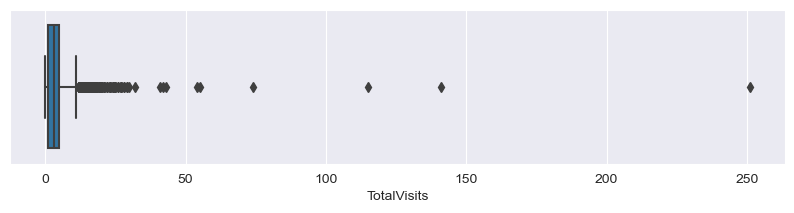

Median of TotalVisits Website is 3.0


In [84]:
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_data['TotalVisits'],color="#1f77b4")
plt.show()
print("Median of TotalVisits Website is",lead_data['TotalVisits'].median())

In [85]:
# as per the above result TotalVisits contains outliers

print("Max quantile:",lead_data.TotalVisits.quantile(.99))
print("Min quantile:",lead_data.TotalVisits.quantile(.01))

Max quantile: 17.0
Min quantile: 0.0


In [86]:
# Removing the outliers
Q3 = lead_data.TotalVisits.quantile(0.99)
Q1 = lead_data.TotalVisits.quantile(0.01)

lead_data = lead_data[(lead_data['TotalVisits'] <= Q3)]
lead_data = lead_data[(lead_data['TotalVisits'] >= Q1)]

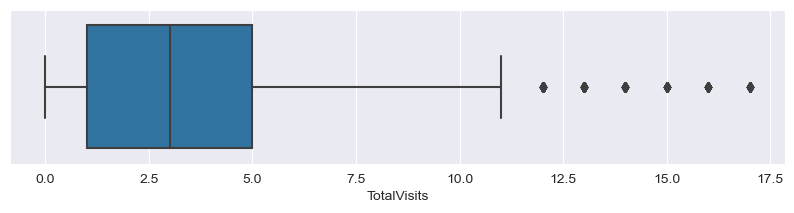

Median of Total Visits Website is 3.0


In [87]:
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_data['TotalVisits'],color="#1f77b4")
plt.show()
print("Median of Total Visits Website is",lead_data['TotalVisits'].median())

In [88]:
lead_data.shape

(9020, 14)

In [89]:
#Analysing Page Views Per Visit

lead_data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

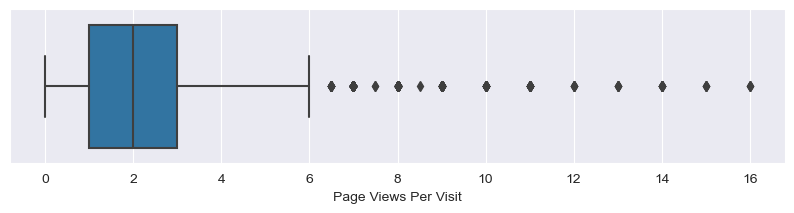

Median of Page Views Per Visit is 2.0


In [90]:
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_data['Page Views Per Visit'],color="#1f77b4")
plt.show()
print("Median of Page Views Per Visit is",lead_data['Page Views Per Visit'].median())

In [91]:
# Removing the outliers for Page Views Per Visit
Q3 = lead_data["Page Views Per Visit"].quantile(0.99)
Q1 = lead_data["Page Views Per Visit"].quantile(0.01)

lead_data = lead_data[(lead_data['Page Views Per Visit'] <= Q3)]
lead_data = lead_data[(lead_data['Page Views Per Visit'] >= Q1)]

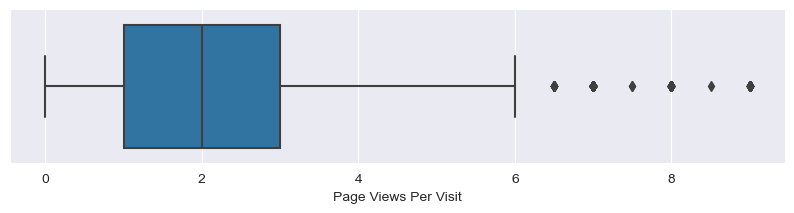

Median of Page Views Per Visit is 2.0


In [92]:
plt.figure(figsize=(10,2))
sns.boxplot(x=lead_data['Page Views Per Visit'],color="#1f77b4")
plt.show()
print("Median of Page Views Per Visit is",lead_data['Page Views Per Visit'].median())

In [93]:
lead_data.shape

(8953, 14)

In [94]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8953.000000,8953.000000,8953.000000,8953.000000
mean,0.379203,3.143081,477.736401,2.266858
std,0.485216,2.903799,544.180321,1.895221
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,5.000000,911.000000,3.000000
max,1.000000,17.000000,2272.000000,9.000000


In [95]:
lead_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### creating dummy variables

In [96]:
lead_data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Mumbai,No,Email Opened


In [97]:
categorical_vals = lead_data.select_dtypes(include=['object']).columns
print(categorical_vals)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')


In [98]:
# we can map the columns where values are in yes-no format 
# such as 'A free copy of Mastering The Interview','Do Not Email'

print(lead_data.value_counts("A free copy of Mastering The Interview",dropna=False))
print("-"*50)
print(lead_data.value_counts("Do Not Email",dropna=False))

A free copy of Mastering The Interview
No     6155
Yes    2798
dtype: int64
--------------------------------------------------
Do Not Email
No     8256
Yes     697
dtype: int64


In [99]:
yes_no_vars = ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({"Yes":1,"No":0})

In [100]:
lead_data[yes_no_vars] = lead_data[yes_no_vars].apply(binary_map)

In [101]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   int64  
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [102]:
# get dummies for categorical data having more than 2 values

for i in ['Lead Origin','What is your current occupation','City']:
    print(lead_data[i].value_counts())
    print("-"*50)

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
--------------------------------------------------
Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64
--------------------------------------------------
Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64
--------------------------------------------------


In [103]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_data[
    ['Lead Origin','What is your current occupation','City']], drop_first=True)

lead_data = pd.concat([lead_data,dummy],axis=1)

In [104]:
lead_data.head(1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0


In [105]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8953 non-null   object 
 1   Lead Source                                           8953 non-null   object 
 2   Do Not Email                                          8953 non-null   int64  
 3   Converted                                             8953 non-null   int64  
 4   TotalVisits                                           8953 non-null   float64
 5   Total Time Spent on Website                           8953 non-null   int64  
 6   Page Views Per Visit                                  8953 non-null   float64
 7   Last Activity                                         8953 non-null   object 
 8   Specialization                                        8953

In [106]:
# creating dummry for remaining variables
dummy = pd.get_dummies(lead_data['Specialization'], prefix  = 'Specialization')
# dummy.columns
dummy.drop(['Specialization_Unknown'], axis=1,inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [107]:
# Now for lead score column

dummy = pd.get_dummies(lead_data['Lead Source'], prefix  = 'Lead Source')
# dummy.columns
dummy.drop(['Lead Source_Others'], axis=1,inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [108]:
# Now for Last Activity column

dummy = pd.get_dummies(lead_data['Last Activity'], prefix  = 'Last Activity')
# dummy.columns
dummy.drop(['Last Activity_Others'], axis=1,inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [109]:
# Now for Last Notable Activity column

dummy = pd.get_dummies(lead_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
# dummy.columns
dummy.drop(['Last Notable Activity_Other Notable Activity'], axis=1,inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [110]:
# Now for Tags column

dummy = pd.get_dummies(lead_data['Tags'], prefix  = 'Tags')
# dummy.columns
dummy.drop(['Tags_Unknown'], axis=1,inplace=True)
lead_data = pd.concat([lead_data, dummy], axis = 1)

In [111]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8953 non-null   object 
 1   Lead Source                                           8953 non-null   object 
 2   Do Not Email                                          8953 non-null   int64  
 3   Converted                                             8953 non-null   int64  
 4   TotalVisits                                           8953 non-null   float64
 5   Total Time Spent on Website                           8953 non-null   int64  
 6   Page Views Per Visit                                  8953 non-null   float64
 7   Last Activity                                         8953 non-null   object 
 8   Specialization                                        8953

##### All Catergorical variables are converted to dummy variables, we can now drop the original columns.

In [112]:
# dropping the original columns after dummy variable creation
# lead_data.select_dtypes(include=['object']).columns

lead_data.drop(categorical_vals,axis=1,inplace = True)

In [113]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

In [114]:
lead_data.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Model building using Logistic Regression

In [115]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

In [116]:
# depedent/target variable 

y = lead_data.Converted
y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [117]:
# Independent Variable

X = lead_data.drop("Converted",axis=1)
X.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [120]:
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,3.0,457,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [121]:
X_test.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [122]:
y_train.head(2)

9196    1
4696    0
Name: Converted, dtype: int64

In [123]:
y_test.head(2)

7681    0
984     0
Name: Converted, dtype: int64

In [124]:
print("\n","X_train:",X_train.shape,"\n",
      "X_test:",X_test.shape,"\n","y_train:",y_train.shape,"\n",
      "y_test:",y_test.shape,"\n")


 X_train: (6267, 56) 
 X_test: (2686, 56) 
 y_train: (6267,) 
 y_test: (2686,) 



In [125]:
# Scaling X_train data using sklearn standardscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Selecting numerical cols for scaling 
numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#### Stats Model and RFE

In [126]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [127]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)    
rfe = rfe.fit(X_train, y_train)

In [128]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [129]:
# checking the rfe Supported columns
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email'], dtype='object')

In [130]:
# Model 1 building 

X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sun, 16 Apr 2023   Deviance:                       2509.3
Time:                        02:44:56   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [131]:
#dropping column with high p-value
rfe_col = rfe_col.drop('Lead Source_Referral Sites',1)

In [132]:
# Model 2 after removing the Lead Source Referral Sites

X_train_sm = sm.add_constant(X_train[rfe_col])
logm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Sun, 16 Apr 2023   Deviance:                       2510.7
Time:                        02:44:56   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### VIF for checking correlation between variables

In [133]:
# importing VIF lib

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [135]:
#Removing variable with high VIF Value - Last Notable Activity_SMS Sent

rfe_col = rfe_col.drop('Last Notable Activity_SMS Sent',1)

In [136]:
#  Model 3

X_train_sm = sm.add_constant(X_train[rfe_col])
logm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Sun, 16 Apr 2023   Deviance:                       2526.6
Time:                        02:44:57   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [137]:
# VIF check 

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


In [138]:
# As per above result, all values are below 5, we can go ahead and do prediction on train  data

y_train_pred = res.predict(X_train_sm)
y_train_pred.shape

(6267,)

In [139]:
# reshaping the values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [140]:
#Converting the predicted variable into a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
#Setting Prospect ID (new column) as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [141]:
# Predicting the output
y_train_pred_final["Predicted"] = y_train_pred_final.Converted_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [142]:
# Model Performance check using confusion matrix.
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3693  189]
 [ 281 2104]]


In [143]:
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [144]:
print ("True positive is",TP)
print ("True negatives is",TN)
print ("False positives is",FP)
print ("False negatives is",FN)

True positive is 2104
True negatives is 3693
False positives is 189
False negatives is 281


In [145]:
# Accuracy score
print("Accuracy Score:",
      metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100)

Accuracy Score: 92.50039891495133


In [146]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is',Sensitivity,'%')

Sensitivity is 88.22 %


In [147]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is',Specificity,'%')

Specificity is 95.13 %


In [148]:
# False positive
print("False positive rate",round(FP/(FP+TN)*100,2),"%")

False positive rate 4.87 %


In [149]:
# positive predictive value
print("Positive predictive value",round(TP/(FP+TP)*100,2),"%")

Positive predictive value 91.76 %


In [150]:
# Negative predictive value
print("Negative predictive value",round(TN/(FN+TN)*100,2),"%")

Negative predictive value 92.93 %


#### Plotting ROC Curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

<Figure size 1500x1500 with 0 Axes>

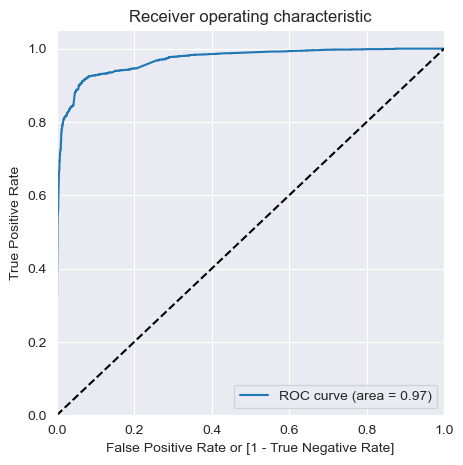

In [153]:
# calling the draw_roc function

plt.figure(figsize=[15,15])
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

In [154]:
# Here we are getting a good value of 0.97 indicating a good predictive model

#### Finding optimal cut-off point

In [155]:
# earliers we had use the fix optimal number i.e 0.5, 
# now we will take range of optimal points (from 0.0 to 0.9).

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


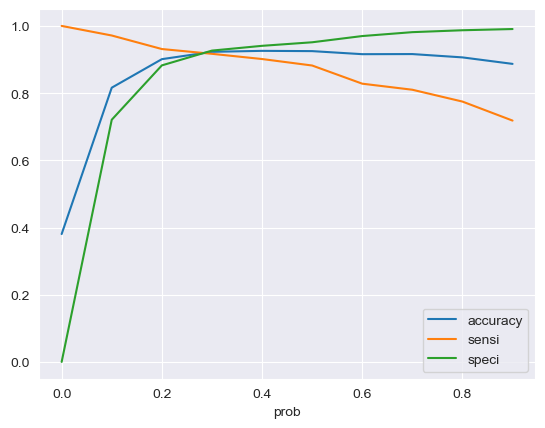

In [157]:
# plotting above results
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [158]:
# As you see from the above graph, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# rounding the Converted_prob
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [160]:
# overall accuracy on final_Predicted.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)*100,2)

92.29

In [161]:
# confusion matrix based on final predicted
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, 
                                      y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# sensitivity
round((TP / float(TP+FN))*100,2)

91.7

In [164]:
# specificity
round(TN / float(TN+FP)*100,2)

92.66

### Insights
- Accuracy on new model: 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

##### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good.

In [165]:
# Calculating False Postive Rate, Positive predictive value , Negative predictive value
print("False Postive Rate:",round(FP / float(TN+FP)*100,2))
print("Positive predictive value:",round(TP / float(TP+FP)*100),2)
print("Negative predictive value:",round(TN / float(TN+FN)*100),2)

False Postive Rate: 7.34
Positive predictive value: 88 2
Negative predictive value: 95 2


In [166]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [167]:
# calculating Precision & Recall Rate

print("Precision Rate:",round(TP/(TP+FP)*100,2))
print("Recall Rate:",round(TP/(TP+FN)*100,2))

Precision Rate: 88.47
Recall Rate: 91.7


In [168]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
recall_score = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [169]:
print("precision score:",precision_score*100)
print("recall score:",recall_score*100)

precision score: 88.47087378640776
recall score: 91.69811320754717


In [170]:
from sklearn.metrics import precision_recall_curve

In [171]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob)

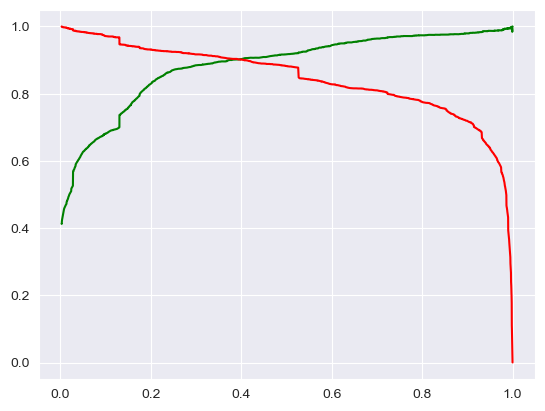

In [172]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [173]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [174]:
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [175]:
X_test_sm = sm.add_constant(X_test)

In [176]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [179]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [180]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [181]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)*100

92.77736411020105

In [182]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, 
                                      y_pred_final.final_Predicted)
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [184]:
# sensitivity of our logistic regression model
print("sensitivity:",round(TP / float(TP+FN)*100,2))
# specificity
print("specificity:",round(TN / float(TN+FP)*100,2))

sensitivity: 91.98
specificity: 93.26


In [185]:
from sklearn.metrics import precision_score, recall_score
print('precision rate:',precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)*100)
print('recall rate:',recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)*100)

precision rate: 89.15547024952015
recall rate: 91.98019801980199


### Insights:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

## <font color="green">Final Observation:</font>

Let us compare the values obtained for Train & Test:

#### Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

#### Test Data:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

#### <font color="green">The Model seems to predict the Conversion Rate very well & we should be able to give the CEO confidence in making good calls based on this model.</font>